# Preparation

In [574]:
# Prepare for the Pandas
import pandas as pd
import numpy as np
df = pd.read_csv ("DOHMH_New_York_City_Restaurant_Inspection_Results.csv", header=0,encoding = 'unicode_escape')

In [575]:
# Prepare for the plot
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [576]:
# Set some Pandas options
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 4000)
pd.set_option('display.max_rows', 4500)

In [577]:
# plot screen size set up
from pylab import rcParams
#default plot size
#rcParams['figure.figsize'] = 6.4, 4.8
rcParams['figure.figsize'] = 14, 5

# Dataset Cleaning

In [578]:
# how many items in the whole dataset (how many restaurants in the city)
len(df.columns)

26

In [579]:
df.head(3)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41002789,SUNSET RIDGE DELI,Brooklyn,5802,5 AVENUE,11220.0,7184394494,Delicatessen,3/6/17,Establishment re-opened by DOHMH,10F,Non-food contact surface improperly constructe...,N,5.0,P,3/6/17,11/14/19,Cycle Inspection / Reopening Inspection,40.640531,-74.015083,307.0,38.0,7400.0,3016005.0,3.008550e+09,BK32
1,50059292,HILLSIDE HOT BAGELS,Queens,20415,HILLSIDE AVE,11423.0,7184652500,Bagels/Pretzels,3/9/17,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,27.0,NaN,NaN,11/14/19,Pre-permit (Operational) / Initial Inspection,40.720408,-73.760937,408.0,23.0,47800.0,4224410.0,4.105330e+09,QN06
2,50071654,TASTEE PATTEE BAKERY AND GRILL,Brooklyn,987,FLATBUSH AVE,11226.0,7184841979,Caribbean,12/20/17,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,69.0,NaN,NaN,11/14/19,Pre-permit (Operational) / Initial Inspection,40.647175,-73.958119,314.0,40.0,79400.0,3117679.0,3.051260e+09,BK95


In [580]:
# drop irrelevant columns
df.drop(['BUILDING','PHONE','ACTION','VIOLATION CODE',
         'VIOLATION DESCRIPTION','CRITICAL FLAG','GRADE DATE',
         'RECORD DATE','INSPECTION TYPE','Community Board',
         'Council District','Census Tract','BIN','BBL','NTA'
        ], axis=1, inplace=True)

In [581]:
df.head(5)

,CAMIS,DBA,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,SCORE,GRADE,Latitude,Longitude
0,41002789,SUNSET RIDGE DELI,Brooklyn,5 AVENUE,11220.0,Delicatessen,3/6/17,5.0,P,40.640531,-74.015083
1,50059292,HILLSIDE HOT BAGELS,Queens,HILLSIDE AVE,11423.0,Bagels/Pretzels,3/9/17,27.0,NaN,40.720408,-73.760937
2,50071654,TASTEE PATTEE BAKERY AND GRILL,Brooklyn,FLATBUSH AVE,11226.0,Caribbean,12/20/17,69.0,NaN,40.647175,-73.958119
3,41458617,RED RIBBON BAKESHOP,Queens,ROOSEVELT AVENUE,11377.0,Filipino,1/10/19,7.0,A,40.746049,-73.898884
4,50046633,PANDA,Queens,YELLOWSTONE BLVD,11375.0,Chinese,9/20/18,10.0,A,40.717681,-73.856995


In [582]:
# Overview of null values in the whole set
df.isnull().sum()

CAMIS                       0
DBA                       684
BORO                        0
STREET                     12
ZIPCODE                  5535
CUISINE DESCRIPTION         0
INSPECTION DATE             0
SCORE                   17148
GRADE                  195800
Latitude                  427
Longitude                 427
dtype: int64

In [583]:
# drop any row that has a null value
df2 = df.dropna(axis = 0, how ='any') 

In [584]:
# columns left after the dropping and adding
df2.columns

Index(['CAMIS', 'DBA', 'BORO', 'STREET', 'ZIPCODE', 'CUISINE DESCRIPTION',
       'INSPECTION DATE', 'SCORE', 'GRADE', 'Latitude', 'Longitude'],
      dtype='object')

In [585]:
# now the null values have gone
df2.isnull().sum()

CAMIS                  0
DBA                    0
BORO                   0
STREET                 0
ZIPCODE                0
CUISINE DESCRIPTION    0
INSPECTION DATE        0
SCORE                  0
GRADE                  0
Latitude               0
Longitude              0
dtype: int64

In [586]:
df2.head(5)

,CAMIS,DBA,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,SCORE,GRADE,Latitude,Longitude
0,41002789,SUNSET RIDGE DELI,Brooklyn,5 AVENUE,11220.0,Delicatessen,3/6/17,5.0,P,40.640531,-74.015083
3,41458617,RED RIBBON BAKESHOP,Queens,ROOSEVELT AVENUE,11377.0,Filipino,1/10/19,7.0,A,40.746049,-73.898884
4,50046633,PANDA,Queens,YELLOWSTONE BLVD,11375.0,Chinese,9/20/18,10.0,A,40.717681,-73.856995
5,50043779,CAFFE BENE,Manhattan,AVENUE A,10009.0,CafÌ©/Coffee/Tea,6/14/19,11.0,Z,40.729618,-73.980917
6,41702635,KAPPOCK CAFE,Bronx,KNOLLS CRESCENT STREET,10463.0,Delicatessen,7/6/15,11.0,P,40.878731,-73.917529


In [587]:
# how many items left after dropping the null values
len(df2)

196904

In [588]:
#df.fillna({'DBA':'UNKNOWN_RS'}, inplace=True)
#df.DBA.isnull().sum()

In [589]:
# overviw of grades
df2.groupby("GRADE").size()

GRADE
A    154451
B     24511
C      9161
G         5
N      1559
P      2607
Z      4610
dtype: int64

In [590]:
# describe the grades
df2["SCORE"].describe().astype('int64')

count    196904
mean         13
std           9
min          -1
25%           9
50%          12
75%          13
max         144
Name: SCORE, dtype: int64

In [591]:
df2.rename(columns={'CUISINE DESCRIPTION':'CUISINE_DESCRIPTION'},inplace = True)

/Users/chrisni/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [592]:
df2.rename(columns={'INSPECTION DATE':'INSPECTION_DATE'},inplace = True )

In [593]:
# make the cuisine category cleaner
df2.CUISINE_DESCRIPTION = df2.CUISINE_DESCRIPTION.replace({"CafÌ©/Coffee/Tea": "Cafe",
                                        "Bottled beverages, including water, sodas, juices, etc.": "Bottles",
                                        "Ice Cream, Gelato, Yogurt, Ices": "Ices",
                                        "Juice, Smoothies, Fruit Salads": "Juice/Fruits",
                                        "Latin (Cuban, Dominican, Puerto Rican, South & Central American)": "Latin",
                                        "Vietnamese/Cambodian/Malaysia": "Southeast Asian",
                                        "Not Listed/Not Applicable": "N/A",
                                        "Sandwiches/Salads/Mixed Buffet": "Mixed Buffet"
                                                          })

/Users/chrisni/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [594]:
#describe the data type of each feature (column)
df2.dtypes

CAMIS                    int64
DBA                     object
BORO                    object
STREET                  object
ZIPCODE                float64
CUISINE_DESCRIPTION     object
INSPECTION_DATE         object
SCORE                  float64
GRADE                   object
Latitude               float64
Longitude              float64
dtype: object

In [595]:
#how much missing data in the whole set by features
df2.isnull().sum()

CAMIS                  0
DBA                    0
BORO                   0
STREET                 0
ZIPCODE                0
CUISINE_DESCRIPTION    0
INSPECTION_DATE        0
SCORE                  0
GRADE                  0
Latitude               0
Longitude              0
dtype: int64

# Adding the column NEIGHBORHOOD

In [596]:
df2.head(3)

,CAMIS,DBA,BORO,STREET,ZIPCODE,CUISINE_DESCRIPTION,INSPECTION_DATE,SCORE,GRADE,Latitude,Longitude
0,41002789,SUNSET RIDGE DELI,Brooklyn,5 AVENUE,11220.0,Delicatessen,3/6/17,5.0,P,40.640531,-74.015083
3,41458617,RED RIBBON BAKESHOP,Queens,ROOSEVELT AVENUE,11377.0,Filipino,1/10/19,7.0,A,40.746049,-73.898884
4,50046633,PANDA,Queens,YELLOWSTONE BLVD,11375.0,Chinese,9/20/18,10.0,A,40.717681,-73.856995


In [597]:
df2['ZIPCODE'] = df2['ZIPCODE'].astype(str)
#df2['ZIPCODE'].apply(lambda x: len(x))

/Users/chrisni/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [598]:
df2.head(2)

,CAMIS,DBA,BORO,STREET,ZIPCODE,CUISINE_DESCRIPTION,INSPECTION_DATE,SCORE,GRADE,Latitude,Longitude
0,41002789,SUNSET RIDGE DELI,Brooklyn,5 AVENUE,11220.0,Delicatessen,3/6/17,5.0,P,40.640531,-74.015083
3,41458617,RED RIBBON BAKESHOP,Queens,ROOSEVELT AVENUE,11377.0,Filipino,1/10/19,7.0,A,40.746049,-73.898884


In [599]:
df2.dtypes

CAMIS                    int64
DBA                     object
BORO                    object
STREET                  object
ZIPCODE                 object
CUISINE_DESCRIPTION     object
INSPECTION_DATE         object
SCORE                  float64
GRADE                   object
Latitude               float64
Longitude              float64
dtype: object

In [600]:
df2 = df2.assign(NEIGHBORHOOD = df2['ZIPCODE'])

In [601]:
df2.dtypes

CAMIS                    int64
DBA                     object
BORO                    object
STREET                  object
ZIPCODE                 object
CUISINE_DESCRIPTION     object
INSPECTION_DATE         object
SCORE                  float64
GRADE                   object
Latitude               float64
Longitude              float64
NEIGHBORHOOD            object
dtype: object

In [602]:
df2.head(2)

,CAMIS,DBA,BORO,STREET,ZIPCODE,CUISINE_DESCRIPTION,INSPECTION_DATE,SCORE,GRADE,Latitude,Longitude,NEIGHBORHOOD
0,41002789,SUNSET RIDGE DELI,Brooklyn,5 AVENUE,11220.0,Delicatessen,3/6/17,5.0,P,40.640531,-74.015083,11220.0
3,41458617,RED RIBBON BAKESHOP,Queens,ROOSEVELT AVENUE,11377.0,Filipino,1/10/19,7.0,A,40.746049,-73.898884,11377.0


In [603]:
# Make sure NEIGHBORHOOD is String
df2.loc [df2['ZIPCODE'] == '11220.0','NEIGHBORHOOD'] = 'Sunset Park'

In [604]:
df2.head(2)

,CAMIS,DBA,BORO,STREET,ZIPCODE,CUISINE_DESCRIPTION,INSPECTION_DATE,SCORE,GRADE,Latitude,Longitude,NEIGHBORHOOD
0,41002789,SUNSET RIDGE DELI,Brooklyn,5 AVENUE,11220.0,Delicatessen,3/6/17,5.0,P,40.640531,-74.015083,Sunset Park
3,41458617,RED RIBBON BAKESHOP,Queens,ROOSEVELT AVENUE,11377.0,Filipino,1/10/19,7.0,A,40.746049,-73.898884,11377.0


In [605]:
#df2['Neighborhood'] = ""

In [606]:
#df2.drop(['NEIGHBORHOOD'], axis=1, inplace=True)

In [607]:
# ZIPCODE TO NEIGHBORHOOD

NEIGHBORHOOD = []

for row in df2['ZIPCODE']:
    
    #---------------Manhattan-----------------------------
    (NEIGHBORHOOD.append('Central Harlem') if row == ("10026.0") or row == ("10027.0") or row == ("10030.0") or row == ("10037.0") or row == ("10039.0") else
     NEIGHBORHOOD.append('Chelsea/Clinton') if row == ("10001.0") or row == ("10011.0") or row == ("10018.0") or row == ("10019.0") or row == ("10020.0") or row == ("10036.0") else
     NEIGHBORHOOD.append('East Harlem') if row == ("10029.0") or row == ("10035.0") else
     NEIGHBORHOOD.append('Gramercy Park/Murray Hill') if row == ("10010.0") or row == ("10016.0") or row == ("10017.0") or row == ("10022.0") else
     NEIGHBORHOOD.append('Greenwich Village/Soho') if row == ("10012.0") or row == ("10013.0") or row == ("10014.0") else
     NEIGHBORHOOD.append('Lower Manhattan') if row == ("10004.0") or row == ("10005.0") or row == ("10006.0") or row == ("10007.0") or row == ("10038.0") or row == ("10280.0") else
     NEIGHBORHOOD.append('Lower East Side') if row == ("10002.0") or row == ("10003.0") or row == ("10009.0") else
     NEIGHBORHOOD.append('Upper East Side') if row == ("10021.0") or row == ("10028.0") or row == ("10044.0") or row == ("10065.0") or row == ("10075.0") or row == ("10128.0") else
     NEIGHBORHOOD.append('Upper West Side') if row == ("10023.0") or row == ("10024.0") or row == ("10025.0") else
     NEIGHBORHOOD.append('Inwood/Washington Heights') if row == ("10031.0") or row == ("10032.0") or row == ("10033.0") or row == ("10034.0") or row == ("10040.0") else
     NEIGHBORHOOD.append('Midtown') if row == ("10155.0") or row == ("10165.0") or row == ("10167.0") or row == ("10172.0") or row == ("10173.0") or row == ("10176.0") or row == ("10177.0") or row == ("10118.0") or row == ("10119.0") or row == ("10121.0") or row == ("10154.0")else
     NEIGHBORHOOD.append('Midtown East') if row == ("10055.0") or row == ("10169.0") or row == ("10171.0") else
     NEIGHBORHOOD.append('Hamilton Heights') if row == ("10115.0") else 
     NEIGHBORHOOD.append('Garmet District') if row == ("10123.0") else
     NEIGHBORHOOD.append('Theater District') if row == ("10103.0") or row == ("10105.0") or row == ("10107.0") or row == ("10111.0") or row == ("10112.0") or row == ("10153.0") or row == ("10179.0") else
     NEIGHBORHOOD.append('Financial District') if row == ("10041.0") or row == ("10271.0") or row == ("10279.0") else
     NEIGHBORHOOD.append('Battery Park City') if row == ("10281.0") else #or row == ("10118.0") else
     NEIGHBORHOOD.append('Tribeca') if row == ("10282.0") or row == ("10048.0") or row == ("10080.0")else
     NEIGHBORHOOD.append("Hells'Kitchen") if row == ("10106.0") else 
     NEIGHBORHOOD.append("Murray Hill") if row == ("10158.0") or row == ("10168.0") or row == ("10170.0")or row == ("10174.0") or row == ("10178.0")else
     NEIGHBORHOOD.append("Lincoln Square") if row == ("10069.0") else 
     NEIGHBORHOOD.append('Upper Harlem') if row == ("12345.0") else
     NEIGHBORHOOD.append('Central Park') if row == ("10000.0") else
     
     #---------------Queens--------------------------------
     NEIGHBORHOOD.append('Northeast Queens') if row == ("11361.0") or row == ("11362.0") or row == ("11363.0") or row == ("11364.0")else
     NEIGHBORHOOD.append('North Queens') if row == ("11354.0") or row == ("11355.0") or row == ("11356.0") or row == ("11357.0") or row == ("11358.0") or row == ("11359.0") or row == ("11360.0")else
     NEIGHBORHOOD.append('Central Queens') if row == ("11365.0") or row == ("11366.0") or row == ("11367.0") else
     NEIGHBORHOOD.append('Jamaica') if row == ("11412.0") or row == ("11423.0") or row == ("11432.0") or row == ("11433.0") or row == ("11434.0") or row == ("11435.0") or row == ("11436.0")else
     NEIGHBORHOOD.append('Northwest Queens') if row == ("11101.0") or row == ("11102.0") or row == ("11103.0") or row == ("11104.0") or row == ("11105.0") or row == ("11106.0")else
     NEIGHBORHOOD.append('West Central Queens') if row == ("11374.0") or row == ("11375.0") or row == ("11356.0") or row == ("11379.0") or row == ("11385.0") else
     NEIGHBORHOOD.append('Rockaways') if row == ("11691.0") or row == ("11692.0") or row == ("11693.0") or row == ("11694.0") or row == ("11695.0") or row == ("11697.0") else
     NEIGHBORHOOD.append('Southeast Queens') if row == ("11004.0") or row == ("11005.0") or row == ("11411.0") or row == ("11413.0") or row == ("11422.0") or row == ("11426.0") or row == ("11427.0") or row == ('11428.0') or row == ('11429.0') else
     NEIGHBORHOOD.append('Southwest Queens') if row == ("11414.0") or row == ("11415.0") or row == ("11416.0") or row == ("11417.0") or row == ("11418.0") or row == ("11419.0") or row == ("11420.0") or row == ('11421.0') else
     NEIGHBORHOOD.append('West Queens') if row == ("11368.0") or row == ("11369.0") or row == ("11370.0") or row == ("11372.0") or row == ("11373.0") or row == ("11377.0") or row == ("11378.0") else
     NEIGHBORHOOD.append('LIC') if row == ("11109.0") else 
     NEIGHBORHOOD.append('Hamilton Beach') if row == ("11430.0") else 
     NEIGHBORHOOD.append('Glen Oaks') if row == ("11040.0") else 
     NEIGHBORHOOD.append('Bellerose Manor') if row == ("11001.0") else 
    
     #---------------Brooklyn-------------------------------
     NEIGHBORHOOD.append('Central BK') if row == ("11212.0") or row == ("11213.0") or row == ("11216.0") or row == ("11233.0") or row == ("11238.0") else
     NEIGHBORHOOD.append('Southwest BK') if row == ("11209.0") or row == ("11214.0") or row == ("11228.0") else
     NEIGHBORHOOD.append('Borough Park') if row == ("11204.0") or row == ("11218.0") or row == ("11219.0") or row == ("11230.0") else
     NEIGHBORHOOD.append('Canarsie/Flatlands') if row == ("11234.0") or row == ("11236.0") or row == ("11239.0") else
     NEIGHBORHOOD.append('Southern BK') if row == ("11223.0") or row == ("11224.0") or row == ("11229.0") or row == ("11235.0") else
     NEIGHBORHOOD.append('Northwest BK') if row == ("11201.0") or row == ("11205.0") or row == ("11215.0") or row == ("11217.0") or row == ("11231.0") else
     NEIGHBORHOOD.append('Flatbush') if row == ("11203.0") or row == ("11210.0") or row == ("11225.0") or row == ("11226.0")else
     NEIGHBORHOOD.append('East NY/New Lots') if row == ("11207.0") or row == ("11208.0") else
     NEIGHBORHOOD.append('Greenpoint') if row == ("11211.0") or row == ("11222.0") else
     NEIGHBORHOOD.append('Sunset Park') if row == ("11220.0") or row == ("11232.0") else
     NEIGHBORHOOD.append('Bushwick/Williamsburg') if row == ("11206.0") or row == ("11221.0") or row == ("11237.0") or row == ("11249.0") else
     NEIGHBORHOOD.append('BK Heights') if row == ("11241.0") or row == ("11242.0") else 
     
     #---------------Bronx----------------------------------
     NEIGHBORHOOD.append('Central Bronx') if row == ("10453.0") or row == ("10457.0") or row == ("10460.0") else
     NEIGHBORHOOD.append('Bronx Park/Fordham') if row == ("10458.0") or row == ("10467.0") or row == ("10468.0") else
     NEIGHBORHOOD.append('High Bridge/Morrisania') if row == ("10451.0") or row == ("10452.0") or row == ("10456.0") else
     NEIGHBORHOOD.append('Hunts Point/Mott Haven') if row == ("10454.0") or row == ("10455.0") or row == ("10459.0") or row == ("10474.0") else
     NEIGHBORHOOD.append('Kingsbridge/Riverdale') if row == ("10463.0") or row == ("10471.0") else
     NEIGHBORHOOD.append('Northeast Bronx') if row == ("10466.0") or row == ("10469.0") or row == ("10470.0") or row == ("10475.0") else
     NEIGHBORHOOD.append('Southeast Bronx') if row == ("10461.0") or row == ("10462.0") or row == ("10464.0") or row == ("10465.0") or row == ("10472.0") or row == ("10473.0")else
     
     #---------------Staten-Island--------------------------
     NEIGHBORHOOD.append('Port Richmond') if row == ("10302.0") or row == ("10303.0") or row == ("10310.0") else
     NEIGHBORHOOD.append('South Shore') if row == ("10306.0") or row == ("10307.0") or row == ("10308.0") or row == ("10309.0") or row == ("10312.0")else
     NEIGHBORHOOD.append('Stapleton/St.George') if row == ("10301.0") or row == ("10304.0") or row == ("10305.0") else
     NEIGHBORHOOD.append('Mid-Island') if row == ("10314.0") else
     
     #---------------Hmmmmm?---------------------------------
     NEIGHBORHOOD.append('Homeless') #sorry, New Yorker only
    )
    

df2['NEIGHBORHOOD'] = NEIGHBORHOOD

#source
#https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm

#10000 is the Zip-Code for Central Park


In [608]:
#df2[(df2["NEIGHBORHOOD"] == "Homeless")]

In [609]:
# Make sure each row has a correct Neighborhood
df2.head(5)

,CAMIS,DBA,BORO,STREET,ZIPCODE,CUISINE_DESCRIPTION,INSPECTION_DATE,SCORE,GRADE,Latitude,Longitude,NEIGHBORHOOD
0,41002789,SUNSET RIDGE DELI,Brooklyn,5 AVENUE,11220.0,Delicatessen,3/6/17,5.0,P,40.640531,-74.015083,Sunset Park
3,41458617,RED RIBBON BAKESHOP,Queens,ROOSEVELT AVENUE,11377.0,Filipino,1/10/19,7.0,A,40.746049,-73.898884,West Queens
4,50046633,PANDA,Queens,YELLOWSTONE BLVD,11375.0,Chinese,9/20/18,10.0,A,40.717681,-73.856995,West Central Queens
5,50043779,CAFFE BENE,Manhattan,AVENUE A,10009.0,Cafe,6/14/19,11.0,Z,40.729618,-73.980917,Lower East Side
6,41702635,KAPPOCK CAFE,Bronx,KNOLLS CRESCENT STREET,10463.0,Delicatessen,7/6/15,11.0,P,40.878731,-73.917529,Kingsbridge/Riverdale


In [610]:
# Draft Cell
#O = df2.groupby('CUISINE_DESCRIPTION')['BORO'].count().sort_values(ascending = False).head(10)
#M = df2.groupby("STREET")['DBA'].count().sort_values(ascending=False).head(15)


# Adding the Column YEAR

In [611]:
df2.INSPECTION_DATE

0           3/6/17
3          1/10/19
4          9/20/18
5          6/14/19
6           7/6/15
            ...   
395901     8/16/17
395903     11/2/17
395904    10/22/19
395905     6/25/19
395908      4/3/18
Name: INSPECTION_DATE, Length: 196904, dtype: object

In [612]:
#df2['YEAR'] = df2['INSPECTION_DATE'].dt.year
df2['INSPECTION_DATE'] = pd.to_datetime(df2.INSPECTION_DATE) 

In [613]:
#df2.head(5)

In [614]:
df2['YEAR'] = df2['INSPECTION_DATE'].dt.year

In [615]:
df2.head(5)

,CAMIS,DBA,BORO,STREET,ZIPCODE,CUISINE_DESCRIPTION,INSPECTION_DATE,SCORE,GRADE,Latitude,Longitude,NEIGHBORHOOD,YEAR
0,41002789,SUNSET RIDGE DELI,Brooklyn,5 AVENUE,11220.0,Delicatessen,2017-03-06,5.0,P,40.640531,-74.015083,Sunset Park,2017
3,41458617,RED RIBBON BAKESHOP,Queens,ROOSEVELT AVENUE,11377.0,Filipino,2019-01-10,7.0,A,40.746049,-73.898884,West Queens,2019
4,50046633,PANDA,Queens,YELLOWSTONE BLVD,11375.0,Chinese,2018-09-20,10.0,A,40.717681,-73.856995,West Central Queens,2018
5,50043779,CAFFE BENE,Manhattan,AVENUE A,10009.0,Cafe,2019-06-14,11.0,Z,40.729618,-73.980917,Lower East Side,2019
6,41702635,KAPPOCK CAFE,Bronx,KNOLLS CRESCENT STREET,10463.0,Delicatessen,2015-07-06,11.0,P,40.878731,-73.917529,Kingsbridge/Riverdale,2015


In [616]:
len(df2.columns)

13

In [617]:
df2.dtypes

CAMIS                           int64
DBA                            object
BORO                           object
STREET                         object
ZIPCODE                        object
CUISINE_DESCRIPTION            object
INSPECTION_DATE        datetime64[ns]
SCORE                         float64
GRADE                          object
Latitude                      float64
Longitude                     float64
NEIGHBORHOOD                   object
YEAR                            int64
dtype: object

# Note: the lower the score, the cleaner the restaurant

# Part 3.1: Data Visualization and Exploration

1. Top 10 Most Inspected Food Types in New York City¶
2. Neighborhood: the Dirties & Cleanest based on Average Socre
3. Average Score over the year in all-category
4. Top 10 Lowest Average Score for American Food in 2019 sorted by Neighborhood
5. 20 Cleanest Restaurants in Greenwich Village/Soho (Average Score)
6. 3 Heatmaps: Chinese Restaurants in 5 Boros with socre no more than 10

# Top 10 Most Inspected Food Types in New York City

In [618]:
# overview of the cuisine
df2.groupby("CUISINE_DESCRIPTION").size().nunique()

83

In [619]:
#how many unique categories of different cuisines
df2.CUISINE_DESCRIPTION.unique()

array(['Delicatessen', 'Filipino', 'Chinese', 'Cafe', 'Thai', 'Spanish',
       'Southeast Asian', 'American', 'Chicken', 'Barbecue', 'Italian',
       'French', 'Sandwiches', 'Latin', 'Mexican', 'Pizza', 'Steak',
       'Bakery', 'Tex-Mex', 'Vegetarian', 'Korean', 'Asian', 'Ices',
       'Middle Eastern', 'Japanese', 'Jewish/Kosher', 'Bagels/Pretzels',
       'English', 'Indian', 'Mixed Buffet', 'Hamburgers', 'Pizza/Italian',
       'Caribbean', 'Pakistani', 'Chinese/Japanese', 'Donuts',
       'Brazilian', 'Juice/Fruits', 'Russian', 'Greek', 'Bottles',
       'Seafood', 'Mediterranean', 'Bangladeshi', 'Other', 'Continental',
       'African', 'Irish', 'Peruvian', 'Turkish', 'Eastern European',
       'Pancakes/Waffles', 'Soul Food', 'Californian', 'German', 'Salads',
       'Tapas', 'Creole', 'Portuguese', 'Soups & Sandwiches', 'Afghan',
       'Chinese/Cuban', 'Hawaiian', 'Iranian', 'Hotdogs',
       'Nuts/Confectionary', 'Chilean', 'Australian', 'Armenian',
       'Southwestern', '

In [620]:
common_most = df2.groupby("CUISINE_DESCRIPTION").size().sort_values(ascending = False).head(10)

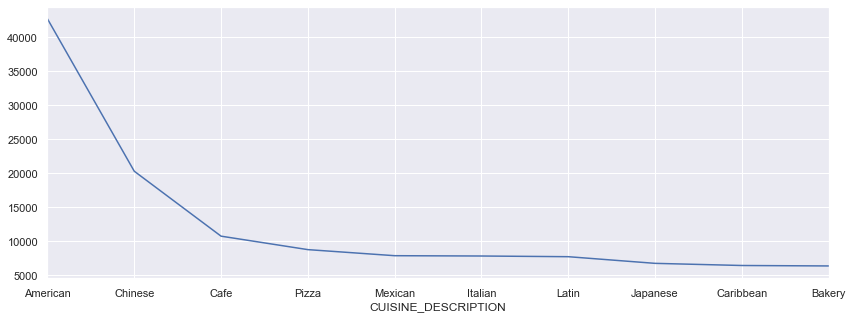

In [621]:
common_most.plot()

Bar Chart

[Text(0, 0, 'American'),
 Text(0, 0, 'Chinese'),
 Text(0, 0, 'Cafe'),
 Text(0, 0, 'Pizza'),
 Text(0, 0, 'Mexican'),
 Text(0, 0, 'Italian'),
 Text(0, 0, 'Latin'),
 Text(0, 0, 'Japanese'),
 Text(0, 0, 'Caribbean'),
 Text(0, 0, 'Bakery')]

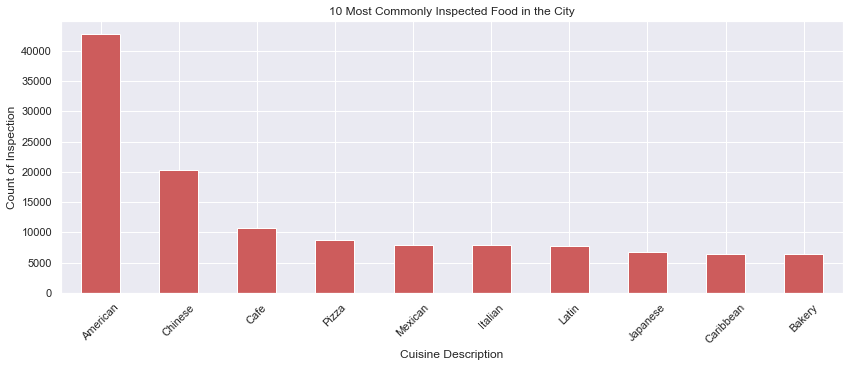

In [622]:
import matplotlib as mpl
import matplotlib.pyplot as plt
vis_1 = common_most.plot(kind='bar',color = "indianred")
vis_1.set_title('10 Most Commonly Inspected Food in the City')
vis_1.set_ylabel('Count of Inspection')
vis_1.set_xlabel('Cuisine Description')
vis_1.set_xticklabels(vis_1.get_xticklabels(), rotation=45)

Stack Chart

In [623]:
D = df2[
        (df2['CUISINE_DESCRIPTION'].isin(["American","Chinese","Cafe","Pizza","Mexican","Italian","Latin","Japanese",
                                         "Caribbean","Bakery"])
        )]

In [624]:
V = df2[ (df2.BORO == 'Manhattan') ]

In [625]:
V.DBA.describe()

count         76691
unique         7957
top       STARBUCKS
freq           1063
Name: DBA, dtype: object

In [626]:
V.groupby('YEAR').size().sort_values()

YEAR
2013        1
2015      107
2016     8045
2017    16801
2018    25060
2019    26677
dtype: int64

In [627]:
V2 = pd.concat(df for _, df in V.groupby(by=['YEAR']) if len(df) > 9000)

In [628]:
V2.groupby('YEAR').size().sort_values()

YEAR
2017    16801
2018    25060
2019    26677
dtype: int64

In [629]:
V2.DBA.describe()

count         68538
unique         7954
top       STARBUCKS
freq            960
Name: DBA, dtype: object

In [630]:
#V3 = V2.groupby('NEIGHBORHOOD')['DBA'].nunique()#.sort_values(ascending=False)#.head(20)#.count()#.sort_values()
#df2.groupby("CUISINE_DESCRIPTION")['SCORE'].mean().sort_values(ascending=False).head(20)
V3 = V2.YEAR.head(3)

In [631]:
V3

25    2017
29    2017
31    2017
Name: YEAR, dtype: int64

In [632]:
V2.head(3)

,CAMIS,DBA,BORO,STREET,ZIPCODE,CUISINE_DESCRIPTION,INSPECTION_DATE,SCORE,GRADE,Latitude,Longitude,NEIGHBORHOOD,YEAR
25,50048150,INTERCONTINENTAL BARCLAY - BAR,Manhattan,E 48TH ST,10017.0,American,2017-10-24,5.0,A,40.755543,-73.973979,Gramercy Park/Murray Hill,2017
29,41489751,HUDSON CLEARWATER,Manhattan,HUDSON STREET,10014.0,French,2017-11-21,12.0,A,40.731049,-74.006729,Greenwich Village/Soho,2017
31,50047392,MY BELLY'S PLAYLIST,Manhattan,W 35TH ST,10001.0,American,2017-11-06,38.0,C,40.751978,-73.990930,Chelsea/Clinton,2017


In [633]:
stack2 = V2.groupby(['NEIGHBORHOOD', 'YEAR'])['NEIGHBORHOOD'].count().sort_values(ascending = True).unstack('YEAR')

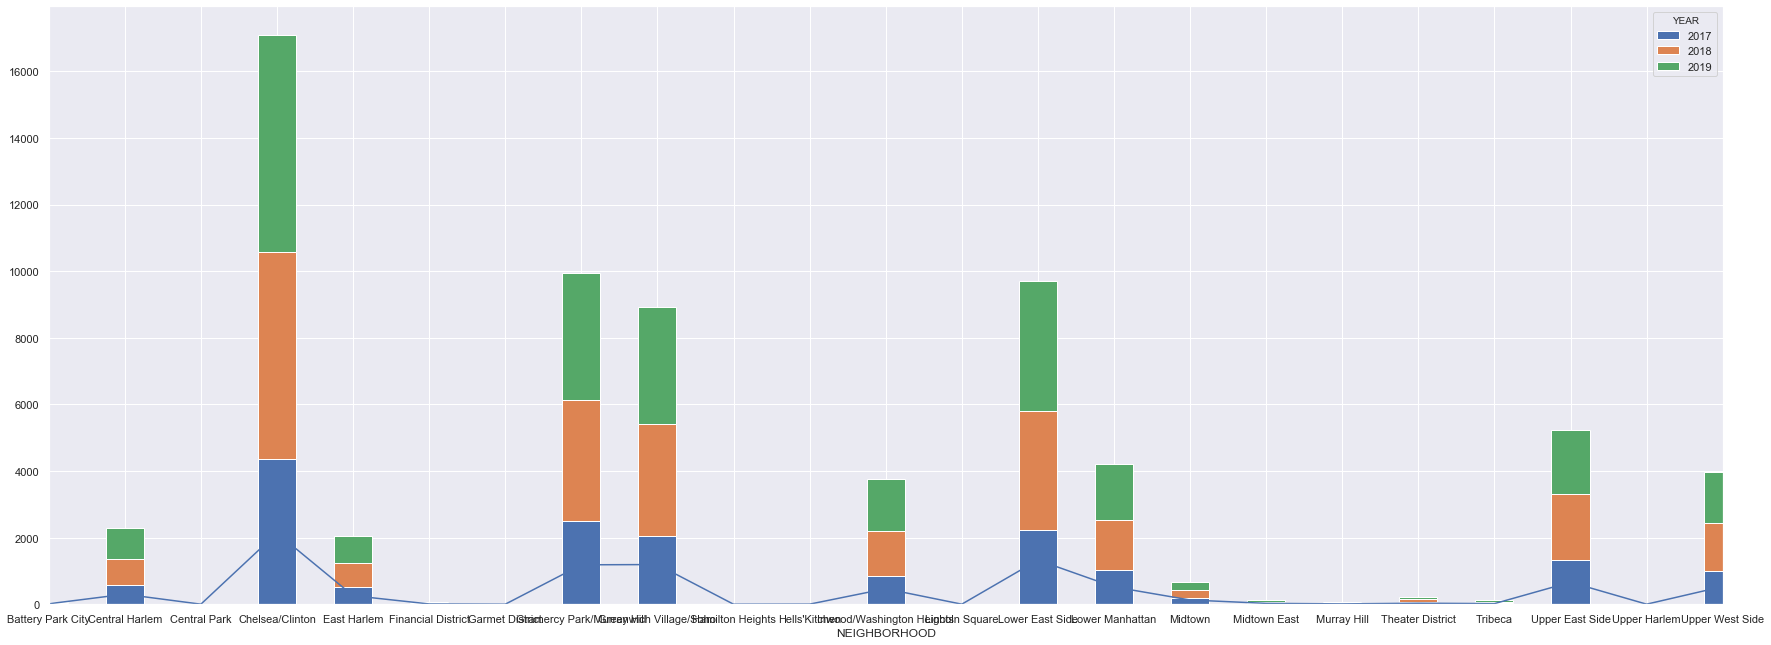

In [634]:
vis_stack2 = stack2.plot(kind='bar', stacked=True, grid=False, figsize=(30,11))
V2.groupby("NEIGHBORHOOD")['DBA'].nunique().plot()

Stack Chart by Boros

[Text(0, 0, 'Bronx'),
 Text(0, 0, 'Brooklyn'),
 Text(0, 0, 'Manhattan'),
 Text(0, 0, 'Queens'),
 Text(0, 0, 'Staten Island')]

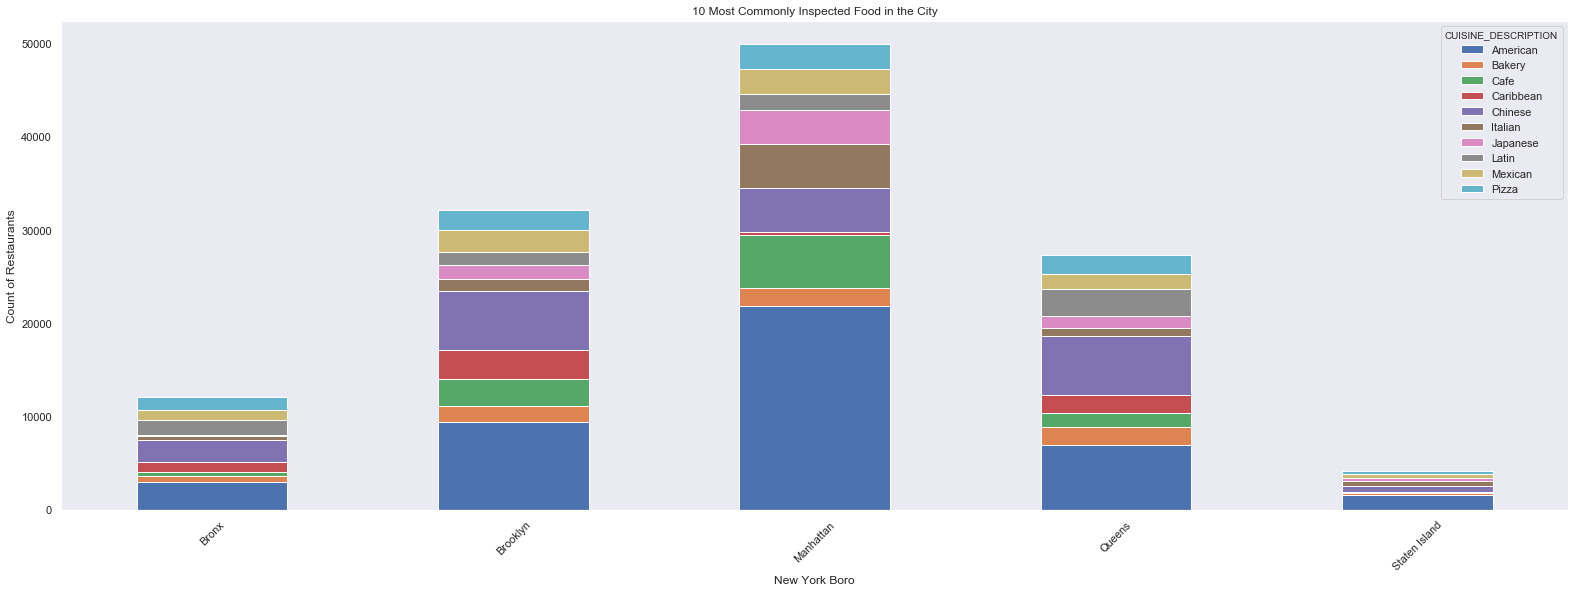

In [635]:
vis_stack = stack.plot(kind='bar', stacked=True, grid=False, figsize=(27,9))
vis_stack.set_title('10 Most Commonly Inspected Food in the City')
vis_stack.set_ylabel('Count of Restaurants')
vis_stack.set_xlabel('New York Boro')
vis_stack.set_xticklabels(vis_stack.get_xticklabels(), rotation=45)

# Neighborhood: the Dirties & Cleanest based on Average Socre

In [636]:
import seaborn as sns; sns.set()
import numpy as np, matplotlib.pyplot as plt
T = P.groupby('NEIGHBORHOOD')['SCORE'].mean().sort_values(ascending = True).head(10)

In [637]:
#sns.set_palette("Paired")
#sns.palplot(x= "NEIGHBORHOOD", y = "GRADE" , data= df2)
#kind='count'
#sns.barplot(x= "NEIGHBORHOOD", y= 'SCORE', data= P)
#fig = plt.gcf()
#fig.set_size_inches(20, 10)

Neighborhoods that have the cleanest Chinese Restaurants

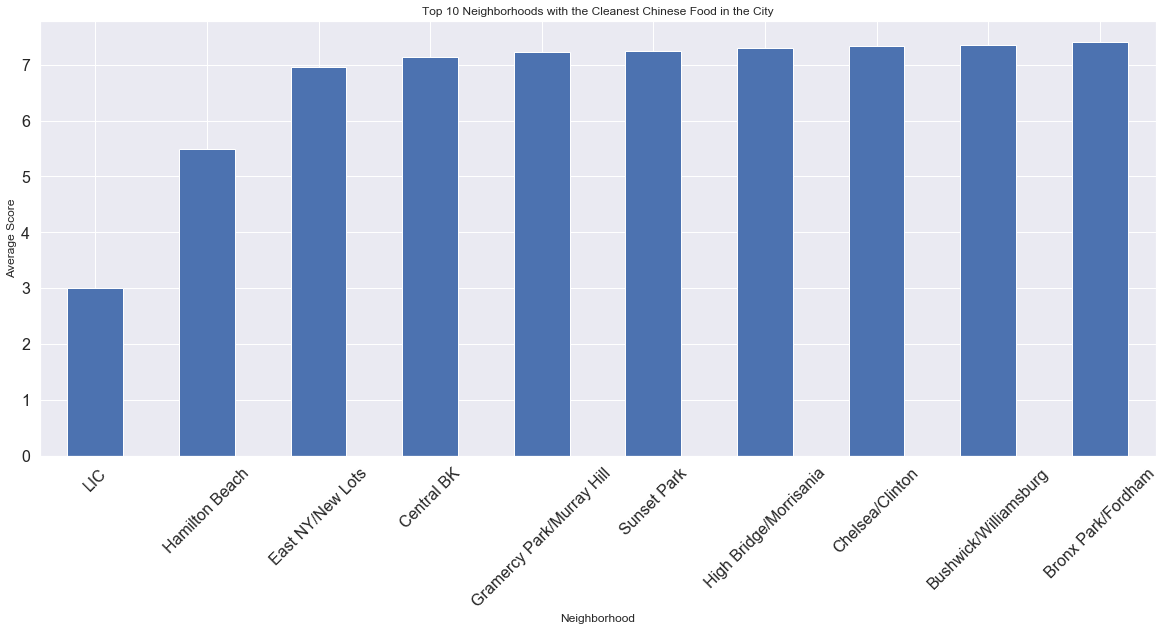

In [638]:
# which ZIP-CODE has the cleanest Chinese Restaurant
sns.set(rc={'figure.figsize':(20,8)})

P_NBHD = P.groupby('NEIGHBORHOOD')['SCORE'].mean().sort_values().head(10).plot(y= 'Mean Score', kind='bar')
P_NBHD.set_title('Top 10 Neighborhoods with the Cleanest Chinese Food in the City')
P_NBHD.set_ylabel('Average Score')
P_NBHD.set_xlabel('Neighborhood')
P_NBHD.set_xticklabels(P_NBHD.get_xticklabels(), rotation=45)
plt.tick_params(labelsize=16)

In [639]:
#df2['GRADE']= df2['GRADE'].astype('int64')

Neighborhoods that have the dirties restaurant (all-category)

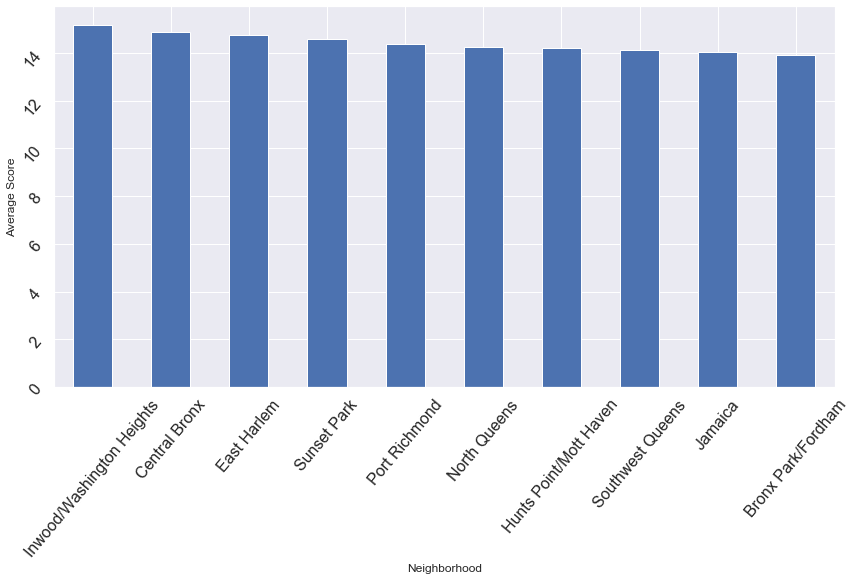

In [640]:
rcParams['figure.figsize'] = 14, 7
df2.groupby('NEIGHBORHOOD')['SCORE'].mean().sort_values(ascending = False).head(10).plot(y= 'Mean Score', kind='bar')
plt.xlabel("Neighborhood") 
plt.ylabel("Average Score") 
plt.tick_params(labelsize=16)
plt.tick_params(rotation=50)

Neighborhood that have the cleanest restaurant (all-category)

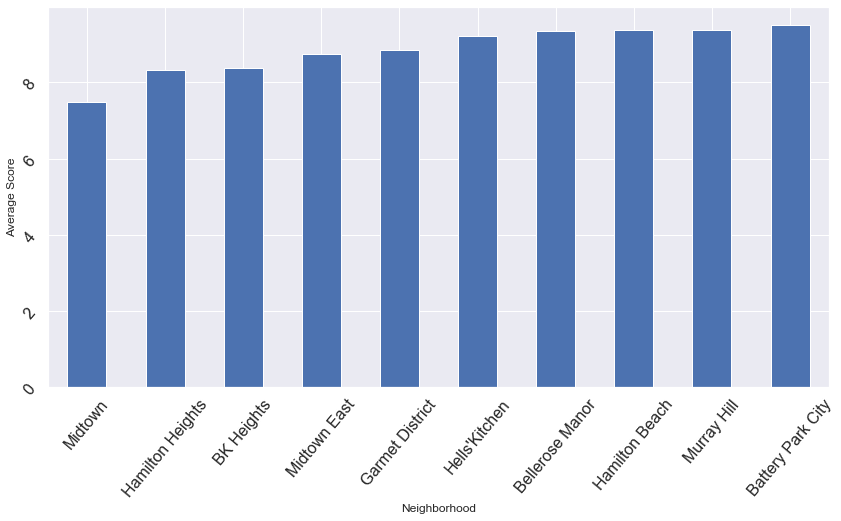

In [641]:
rcParams['figure.figsize'] = 14, 7
df2.groupby('NEIGHBORHOOD')['SCORE'].mean().sort_values().head(10).plot(y= 'Mean Score', kind='bar')
plt.xlabel("Neighborhood") 
plt.ylabel("Average Score") 
plt.tick_params(labelsize=16)
plt.tick_params(rotation=50)

Manhattan Neighborhood Overview

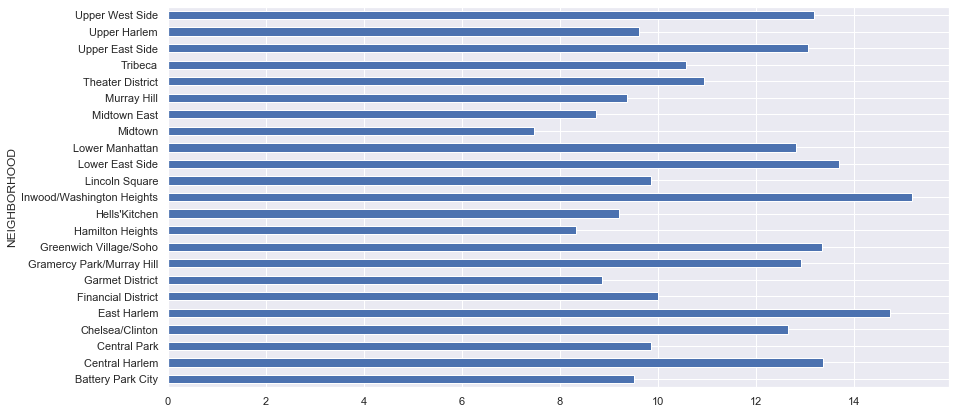

In [642]:
BORO_Manhattan = df2[ (df2['BORO'] == 'Manhattan')]
BORO_Manhattan.groupby(['NEIGHBORHOOD']).SCORE.mean().plot(kind='barh')

# Average Score over the year in all-category 

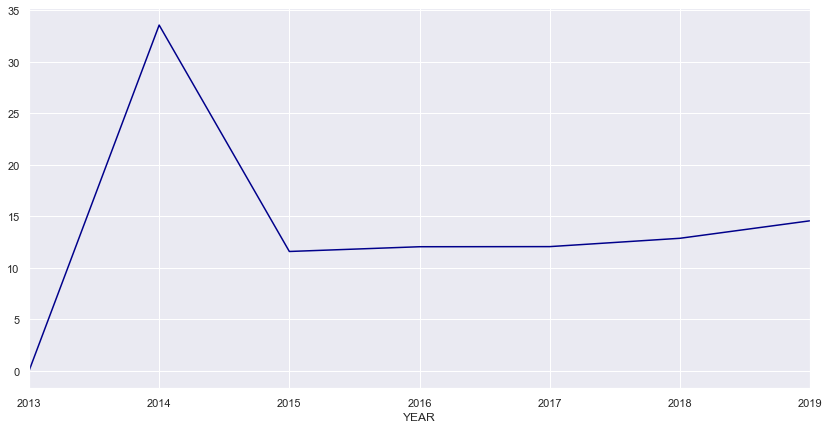

In [643]:
#A = df2[ (df2['CUISINE_DESCRIPTION'] == "American")]
#df2.groupby("YEAR").size().plot()
#df2.groupby('YEAR')['SCORE'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')
df2.groupby('YEAR')['SCORE'].mean().head(10).plot( color = 'Darkblue')

# Top 10 Lowest Average Score for American Food in 2019 sorted by Neighborhood

In [644]:
American_M_2019 = df2[ (df2.CUISINE_DESCRIPTION == "American")  & (df2.BORO =="Manhattan")  & (df2.YEAR == 2019)] 

In [645]:
American_M_2019_5 = pd.concat(df for _, df in American_M_2019.groupby(by=['NEIGHBORHOOD']) if len(df) > 5)

In [646]:
American_M_2019_5.groupby('NEIGHBORHOOD').size().sort_values()

NEIGHBORHOOD
Midtown East                    7
Murray Hill                    11
Battery Park City              19
Financial District             19
Theater District               22
Tribeca                        23
Midtown                        84
East Harlem                   114
Central Harlem                193
Inwood/Washington Heights     216
Upper West Side               317
Upper East Side               481
Lower Manhattan               562
Lower East Side               878
Greenwich Village/Soho        900
Gramercy Park/Murray Hill    1083
Chelsea/Clinton              2125
dtype: int64

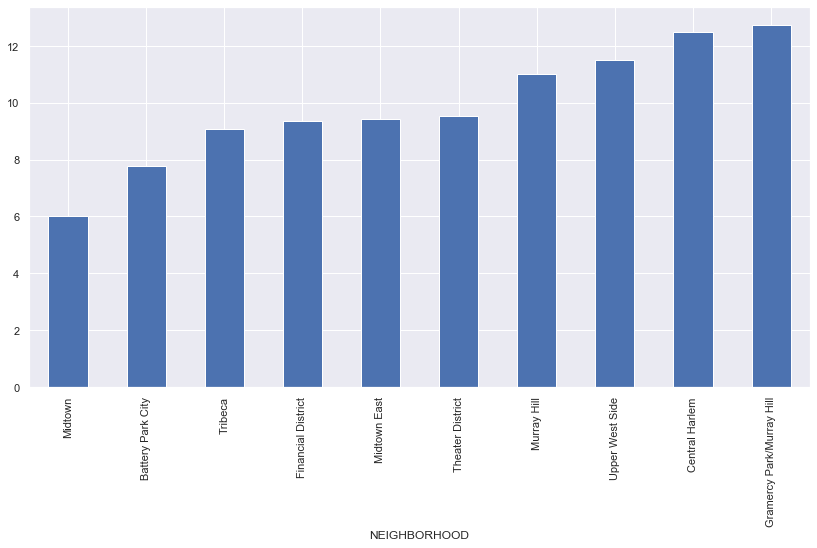

In [647]:
American_M_2019_5.groupby('NEIGHBORHOOD')['SCORE'].mean().sort_values(ascending = True).head(10).plot(kind = 'bar')

# 20 Cleanest Restaurants in Greenwich Village/Soho (Average Score)

In [648]:
G = df2[(df2["NEIGHBORHOOD"] == "Greenwich Village/Soho")]

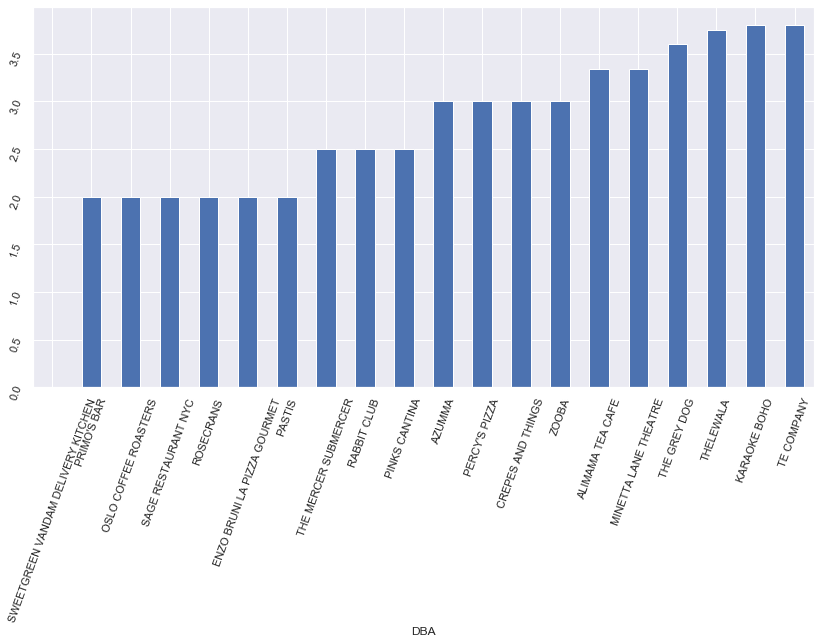

In [649]:
vis_Greenwich = G.groupby('DBA')['SCORE'].mean().sort_values().head(20).plot(y= 'Mean Score', kind='bar')
plt.tick_params(rotation=70)

# 3 Heatmaps: Chinese Restaurants in 5 Boros with socre no more than 10

In [650]:
P = df2[ (df2.CUISINE_DESCRIPTION =="Chinese")
       & (df2['BORO'].isin(["Manhattan","Queens","Brooklyn","Bronx","Staten Island"]))
       & (df2.SCORE <= 10.0)
       #& (df2.GRADE >="A")
       ]

In [651]:
#only show 5 items Sample under P Condition
P.head(5)

,CAMIS,DBA,BORO,STREET,ZIPCODE,CUISINE_DESCRIPTION,INSPECTION_DATE,SCORE,GRADE,Latitude,Longitude,NEIGHBORHOOD,YEAR
4,50046633,PANDA,Queens,YELLOWSTONE BLVD,11375.0,Chinese,2018-09-20,10.0,A,40.717681,-73.856995,West Central Queens,2018
42,50064947,420 NO.1 CHINESE FOOD,Brooklyn,DITMAS AVE,11218.0,Chinese,2017-06-28,2.0,P,40.635893,-73.974761,Borough Park,2017
59,41505364,NEW HONG CHEONG RESTAURANT,Brooklyn,GREENE AVENUE,11238.0,Chinese,2019-07-01,9.0,A,40.686653,-73.966308,Central BK,2019
131,50058204,KING WAH RESTAURANT ZHANG,Queens,NORTHERN BLVD,11377.0,Chinese,2017-10-04,10.0,A,40.754306,-73.897283,West Queens,2017
172,50050186,DELICIOUS,Manhattan,2ND AVE,10029.0,Chinese,2018-08-08,10.0,A,40.787740,-73.944535,East Harlem,2018


Geographical Heatmap 1

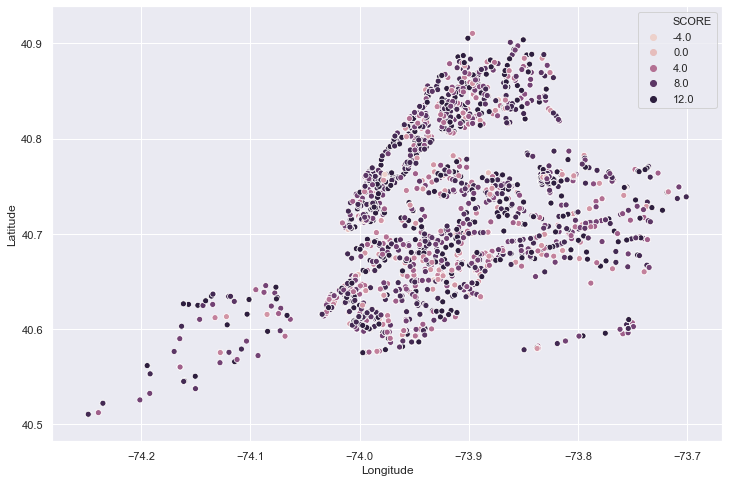

In [652]:
import seaborn as sns
#plt.figure(figsize=(10,6))
plt.figure(figsize=(12,8))
sns.scatterplot(P.Longitude, P.Latitude, hue=P.SCORE)
plt.ioff()

Geographical Heatmap 2

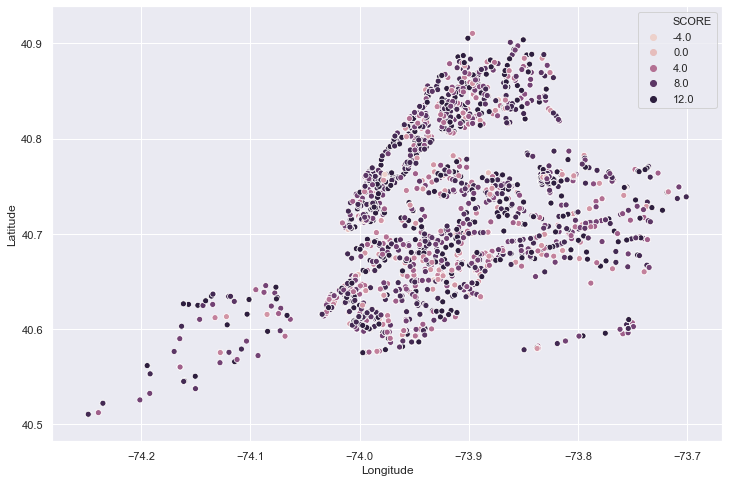

In [653]:
import seaborn as sns
#plt.figure(figsize=(10,6))
plt.figure(figsize=(12,8))
sns.scatterplot(P.Longitude, P.Latitude, hue=P.SCORE)
plt.ioff()

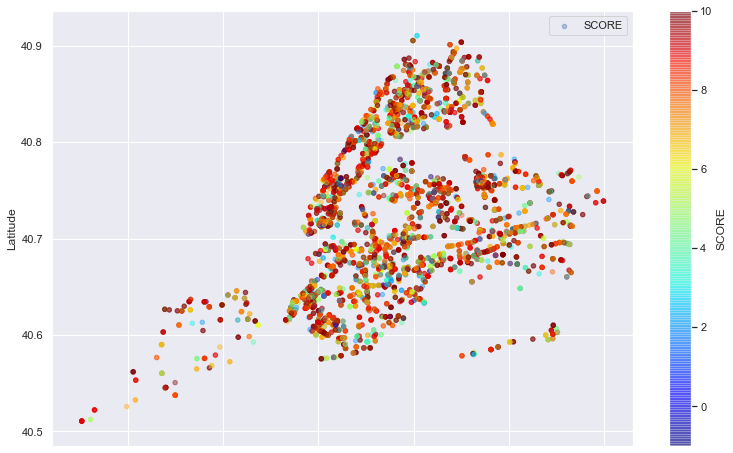

In [654]:
#vis_map = df2[(df2.SCORE >= 10.0) & (df2.BORO == 'Manhattan') & (df2.CUISINE_DESCRIPTION == 'Chicken') ]
#       & (df2.GRADE == 'A')]
#vis_map = df2.SCORE
#figsize=(10,8))
vis_map =P.plot(kind='scatter', x ='Longitude', y ='Latitude' , label='SCORE', c='SCORE',
                 cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(13,8))
vis_map.legend()

Geographical Heatmap 3 with a NYC Map

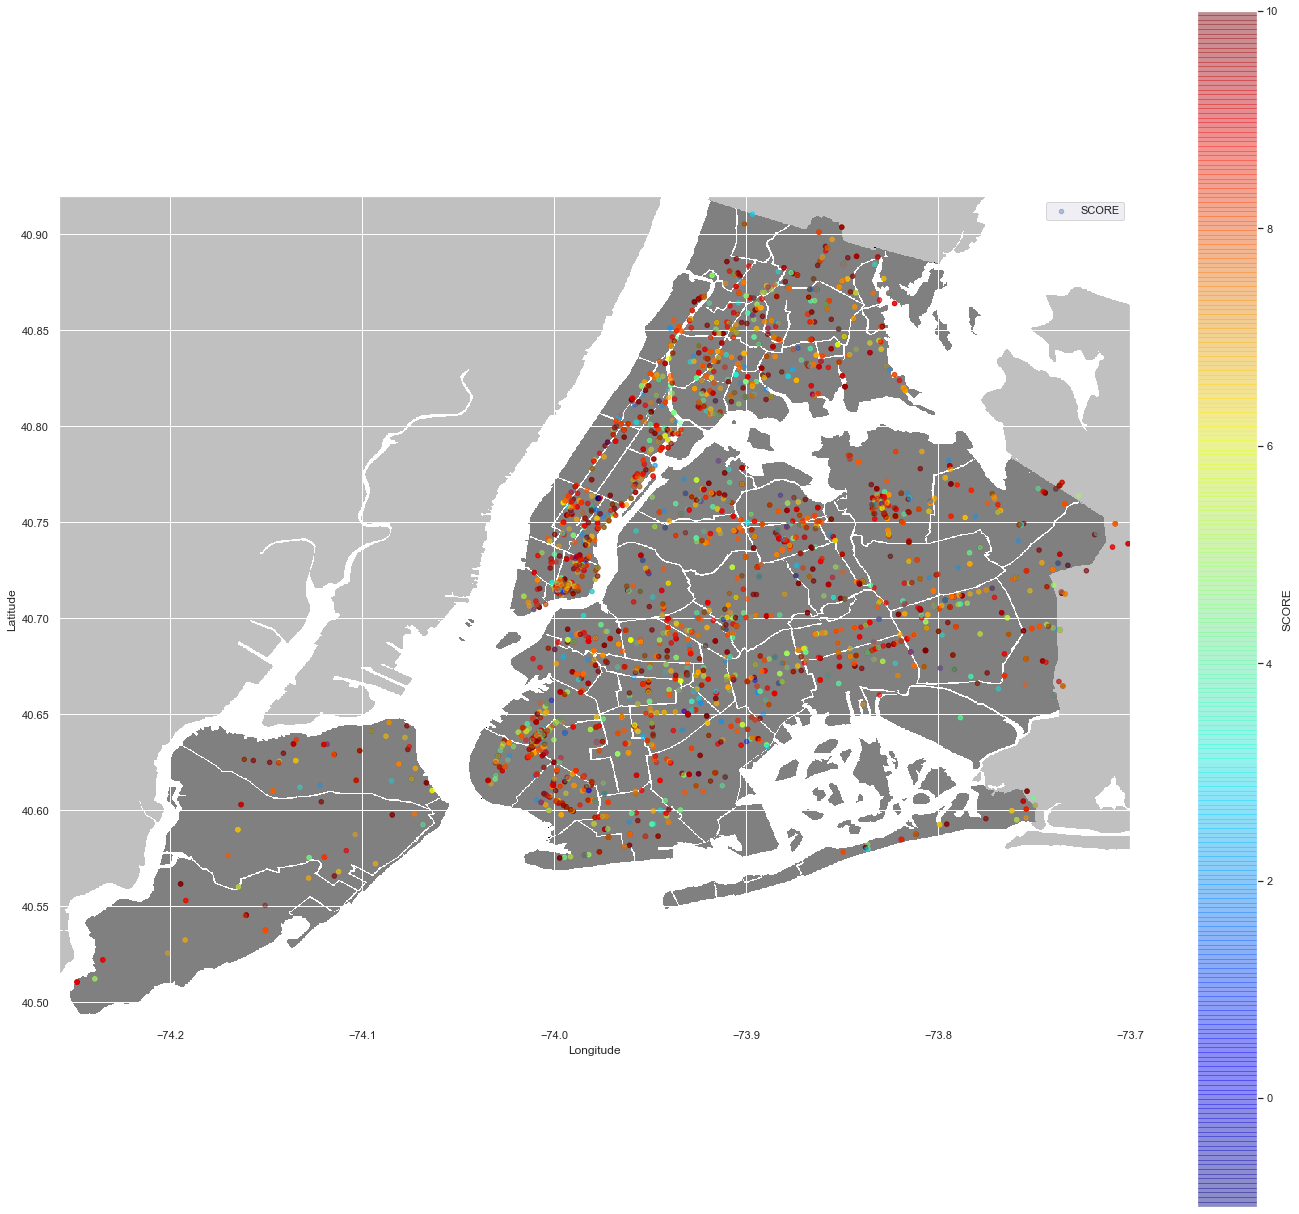

In [655]:
import urllib
plt.figure(figsize=(24,22))

#loading the png NYC image found on Google and saving to my local folder along with the project
i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img = plt.imread(i)

#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax = plt.gca()

#using scatterplot again
P.plot(kind='scatter', x='Longitude', y='Latitude', label='SCORE', c='SCORE', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

# Part 3.2: Descriptive Statistical Measures

Histograms: Overall Manhattan and Neighborhoods 

In [656]:
BORO_Manhattan = df2[ (df2['BORO'] == 'Manhattan')]

In [657]:
BORO_Manhattan['SCORE'].describe().astype(int)

count    76691
mean        13
std          9
min         -1
25%          9
50%         12
75%         13
max        133
Name: SCORE, dtype: int64

Histogram for Overall Score in Manhattan

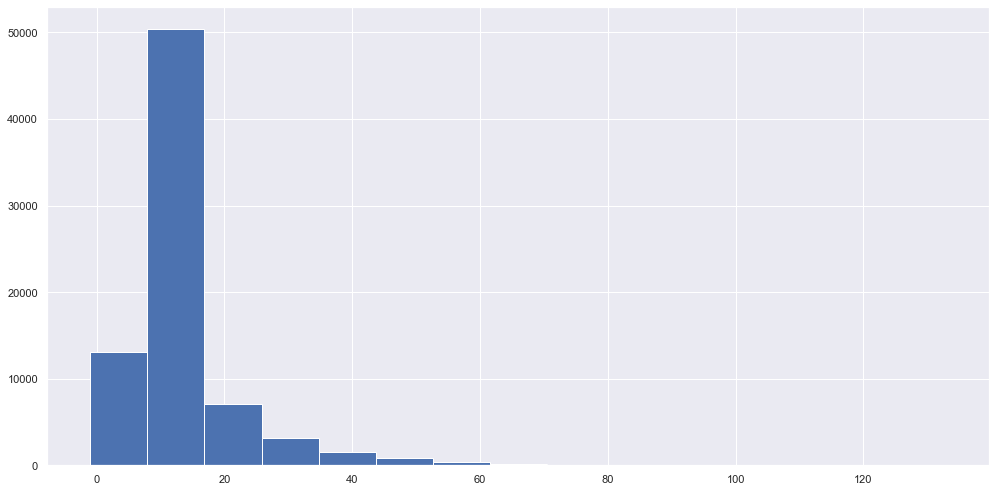

In [658]:
plt.hist( x="SCORE", data = BORO_Manhattan, bins= 15)
plt.tight_layout()

Histrogram for each Manhattan Neighborhood

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1ad9dcc350>,
      dtype=object)

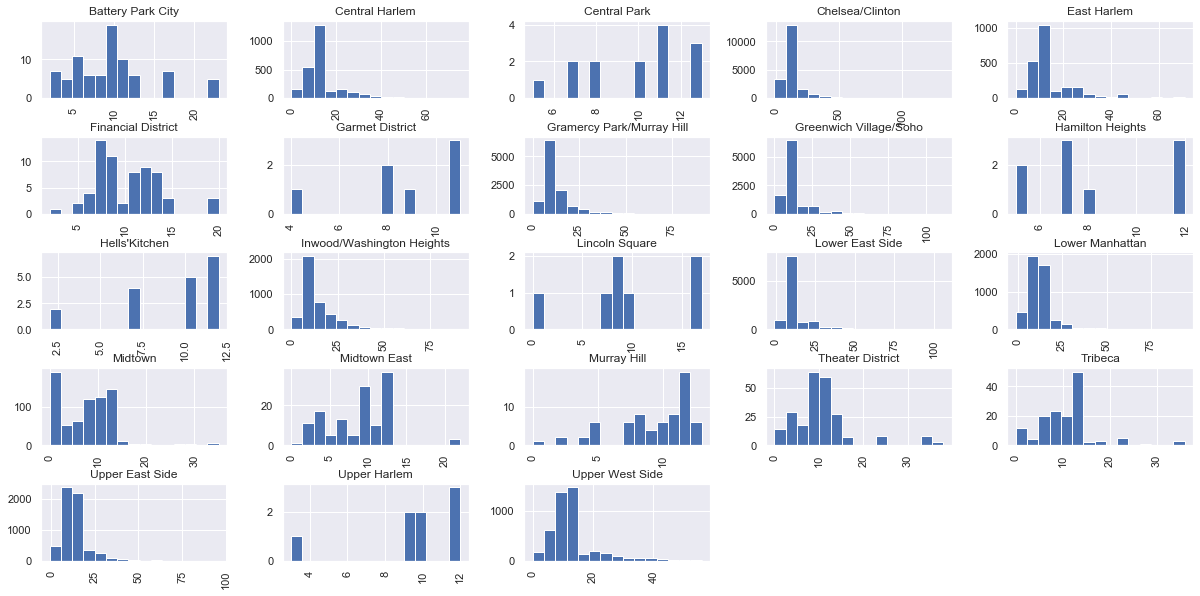

In [659]:
BORO_Manhattan['SCORE'].hist(by = BORO_Manhattan['NEIGHBORHOOD'],figsize = (20,10),bins = 15)

# Skewed Distributions

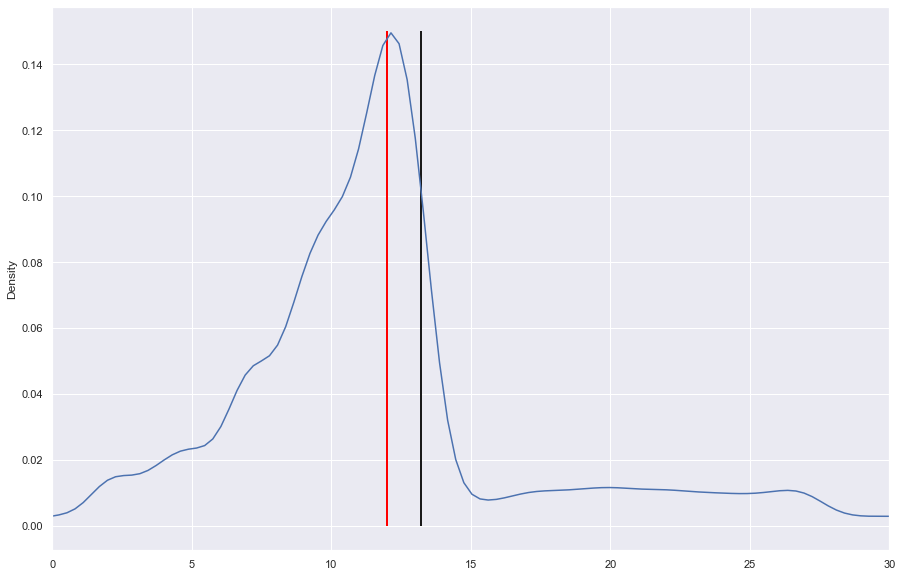

In [660]:
#VV = df2[ (df2.NEIGHBORHOOD == "Chelsea/Clinton")]
#VV = df2[ (df2.BORO == "Manhattan")]
score_city = df2.SCORE
score_city.plot(kind="density",figsize=(15,10), xlim=(0,30) )

# Plot a black line at mean
plt.vlines(score_city.mean(),      ymin=0,  ymax=0.15, linewidth= 2.0)

# Plot a red line at median
plt.vlines(score_city.median(),    ymin=0, ymax=0.15, linewidth=2.0, color="red")


Describe the Scores in integer

In [661]:
score_city.describe().astype('int64')`

SyntaxError: invalid syntax (<ipython-input-661-405366e3a59e>, line 1)

Score Median

In [ ]:
score_city.median()

Quantile

In [ ]:
quantile = [score_city.quantile(0),
            score_city.quantile(0.25),
            score_city.quantile(0.5),
            score_city.quantile(0.75),
            score_city.quantile(1)]

In [ ]:
quantile

Boxplot

In [ ]:
df2.boxplot(column="SCORE", return_type='axes',figsize=(8,12))

plt.text(x=0.75, y=13.0, s="3rd Quartile")
plt.text(x=0.6,  y=12.0, s="Median")
plt.text(x=0.75, y=9.0,  s="1st Quartile")


Skewness

In [ ]:
score_city.skew()

Kurtosis

In [ ]:
score_city.kurt()

# Draft for more Visualization

In [ ]:
#sub_1=df2.loc[df2['BORO'] == 'Brooklyn']
#price_sub1=sub_1[['CUISINE_DESCRIPTION']].count().sort_values(ascending = False).head(20)

In [ ]:
#price_sub1.head(20)

In [ ]:
#BORO_Manhattan = df2[ (df2['BORO'] == 'Manhattan')]
#KK = df2.groupby('BORO')['CUISINE_DESCRIPTION'].count()#.sort_values(ascending = False).head(10)

In [ ]:
#KK.plot(kind='bar',color = "indianred")

In [ ]:
#O.sort_values(["SCORE"], ascending=True).head(15)

In [ ]:
#Draft Below

In [ ]:
#pivot_df = df2.pivot(index='BORO', columns='CUISINE_DESCRIPTION', values=df2.CUISINE_DESCRIPTION.count())
#pivot_df

In [ ]:
#M = O.groupby("ZIPCODE")['DBA'].count().sort_values(ascending=False).head(15)
#M = O.groupby("STREET")['DBA'].count().sort_values(ascending=False).head(15)

In [ ]:
#M

In [ ]:
#from pylab import rcParams
#rcParams['figure.figsize'] = 12, 8

In [ ]:
#O.groupby('ZIPCODE').count().plot(y= 'DBA', kind='bar')
#M.plot(y= 'DBA', kind='bar', width=0.85, colormap='Paired')

In [ ]:
#Z = df2[(df2['CUISINE DESCRIPTION']=="Japanese") & (df2['BORO']== "Manhattan") & (df2['GRADE']=="A") 
#        & (df2['SCORE']>= 10.0)]

In [ ]:
#Z.sort_values(["SCORE"], ascending=False).head(5)
#X = df2[ (df2['BORO']== "Manhattan") & (df2['GRADE']=="A") & (df2['SCORE']>= 10.0)]

In [ ]:
#X = (df2.groupby("CUISINE DESCRIPTION")['SCORE'].mean().sort_values(ascending=False).head(20))
#C = df2.groupby("CUISINE_DESCRIPTION")['SCORE'].mean().sort_values(ascending=False).head(20)

In [ ]:
#C.plot(kind = "bar")